# **Did Average Annual Bike Theft Change Significantly During Jim Chu's Tenure as VPD Chief Constable in Vancouver (2007-2015)?**

### Group 46: Alizah Irfan, Jessie Zhao, Ayaan Ahuja, Mehardeep Singh

# Introduction
In the context of a transition in law enforcement leadership, the impact on crime rates is a topic of great concern. The Vancouver Police Department, a key pillar of law enforcement, was led by three police chiefs from 2003 to 2023([Vancouver Police Department](https://vpd.ca/about-the-vpd/executive-team/)). The Chief of Police serves as the highest echelon of the police force. It plays a key role in developing law enforcement strategies, resource allocation, and the overall safety and security of the community(Marquis, 1993). 
### Research Question
Our research sought to understand whether Jim Zhu's appointment as police chief brought about a significant shift in crime dynamics, focusing specifically on the annual bike theft rate. In this investigation, we intend to compare Jim Chu's tenure with that of his predecessor, Jamie Graham, and his successor, Adam Palmer.
### Variables
To address this question, we used statistical inference techniques to analyze the average annual number of bike thefts. We consider the average annual number of bike theft as our location parameter, a variable that provides the core measure of bike theft rates for the period in question. We also study standard deviation as a scaling parameter to measure the variability and distribution of bike theft numbers.
### Dataset Description
Our dataset is derived from the Vancouver Police Department's open data repository and contains crime data from 2003 to 2023 ([Vancouver Police Department (VPD) crime data](https://geodash.vpd.ca/opendata/)). Each row represents a reported crime, with different variables including crime type, neighborhood, date, time, and street location. For the purposes of our research, we will examine the crime type and year for each record. We'll group the data by year and calculate the average number of bike theft per year during each police chief's tenure. We will then determine whether the difference in estimated means is significant.
It is estimated that “between 25 to 40 per cent of bike thefts go unreported” (CBC, 2020). The dataset will represent a sample of all stolen bikes in Vancouver. 
# Preliminary Results:
### Loading Packages
Our data analysis commenced with the loading of essential R packages, including `tideverse` and `infer`. These packages provide tools for data cleaning, visualization, and conducting statistical inferences. To ensure accessibility and readability, we also customized the plot dimensions and selected color palettes suitable for individuals with color vision impairments.


In [19]:
library(tidyverse)
library(infer)
library(ggplot2)

## Preliminary Results

In this section, you will:

Demonstrate that the dataset can be read from the web into R.
* Clean and wrangle your data into a tidy format.
* Plot the relevant raw data, tailoring your plot in a way that addresses your question.
* Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.

library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(taxyvr)
library(cowplot)Be sure to not print output that takes up a lot of screen space.

In [2]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(taxyvr)
library(cowplot)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [3]:
crimedata <- read.csv('https://raw.githubusercontent.com/alizahirfan/stat201-project/55764f86988a1cd4121c6394cf0d82940ab7f3bf/crimedata.csv', header = TRUE, sep = ",")

In [4]:
head(crimedata)

crimedata_filtered <- crimedata %>% 
                        select(TYPE, YEAR) %>%
                        filter(TYPE == "Theft of Bicycle")
head(crimedata_filtered)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2012,12,14,8,52,,Oakridge,491285.0,5453433
2,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
3,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
4,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
5,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
6,Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166


,TYPE,YEAR
,<chr>,<int>
1,Theft of Bicycle,2005
2,Theft of Bicycle,2006
3,Theft of Bicycle,2008
4,Theft of Bicycle,2009
5,Theft of Bicycle,2011
6,Theft of Bicycle,2015


In [5]:
crimedata_summary <- crimedata_filtered %>% 
group_by(YEAR) %>%
summarize(count = n())

head(crimedata_summary)

YEAR,count
<int>,<int>
2003,1419
2004,1230
2005,1416
2006,1467
2007,1203
2008,1176


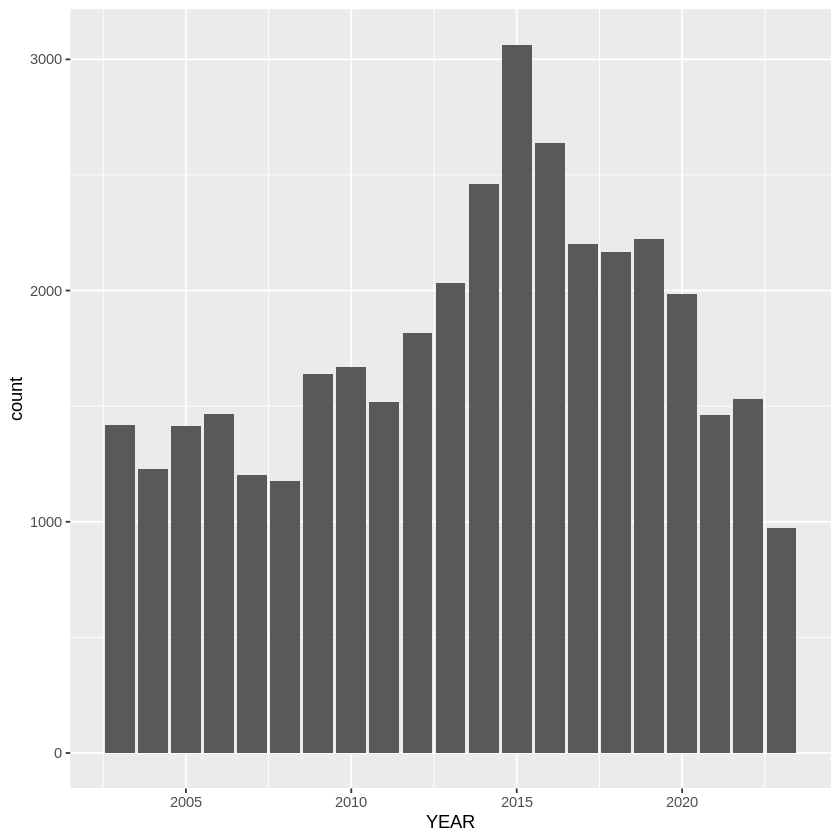

In [6]:
data_vis <- crimedata_summary %>%
            ggplot(aes(x = YEAR, y = count)) +
            geom_bar(stat = "identity")

data_vis

In [7]:
crimedata_palmer <- crimedata_filtered %>%
                    filter(YEAR <= 2007)
crimedata_chu <- crimedata_filtered %>%
                    filter(YEAR > 2007 & YEAR <= 2015)
crimedata_graham <- crimedata_filtered %>%
                    filter(YEAR > 2015)

head(crimedata_palmer)
head(crimedata_chu)
head(crimedata_graham)

,TYPE,YEAR
,<chr>,<int>
1,Theft of Bicycle,2005
2,Theft of Bicycle,2006
3,Theft of Bicycle,2006
4,Theft of Bicycle,2003
5,Theft of Bicycle,2004
6,Theft of Bicycle,2004


,TYPE,YEAR
,<chr>,<int>
1,Theft of Bicycle,2008
2,Theft of Bicycle,2009
3,Theft of Bicycle,2011
4,Theft of Bicycle,2015
5,Theft of Bicycle,2012
6,Theft of Bicycle,2015


,TYPE,YEAR
,<chr>,<int>
1,Theft of Bicycle,2023
2,Theft of Bicycle,2017
3,Theft of Bicycle,2021
4,Theft of Bicycle,2018
5,Theft of Bicycle,2022
6,Theft of Bicycle,2022


In [18]:
palmer_year_summary <- crimedata_palmer %>%
                        group_by(YEAR) %>%
                        summarize(count = n())

palmer_mean <- palmer_year_summary %>%
                select(count) %>%
                summarize(mean_theft = mean(count)) %>%
                pull() 

chu_year_summary <- crimedata_chu %>%
                        group_by(YEAR) %>%
                        summarize(count = n())

chu_mean <- chu_year_summary %>%
                select(count) %>%
                summarize(mean_theft = mean(count)) %>%
                pull() 

graham_year_summary <- crimedata_graham %>%
                        group_by(YEAR) %>%
                        summarize(count = n())

graham_mean <- graham_year_summary %>%
                select(count) %>%
                summarize(mean_theft = mean(count)) %>%
                pull() 

palmer_mean
chu_mean
graham_mean

[1] 1347

[1] 1922.125

[1] 1897.25

## Method Plan

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:

* What do you expect to find?
* What impact could such findings have?
* What future questions could this lead to?

## References

At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.